# Actividad práctica ampliada – Bank Marketing
Aplica el workflow completo: EDA profundo, limpieza, modelado y optimización para clasificación binaria.

## Objetivo
Guiar al alumno desde la exploración inicial del dataset hasta la entrega de un modelo optimizado, con análisis y justificación en cada fase.

## Resumen del flujo
1. EDA completo
2. Preparación y feature engineering
3. Modelado y optimización
4. Conclusiones y guardado de artefactos

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesado
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Splits
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Métricas
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score
)

# Pipelines (muy importante)
from sklearn.pipeline import Pipeline

# Guardado del modelo
import joblib

# Estética y configuración
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)


## 1. Carga y revisión inicial
Describe de dónde obtuviste el CSV y qué verificaste (tipos, nulos, cardinalidades).

In [ ]:

# Descripción:
# El dataset proviene del UCI Machine Learning Repository (versión Bank Marketing Dataset).
# Verificamos:
#  - Tipos de datos
#  - Valores nulos
#  - Cardinalidad de columnas categóricas
#  - Primeras filas para asegurarnos de que carga correctamente

# Ruta al dataset utilizado en la actividad
data_path = 'bank-additional-full-dirty.csv'

# Cargar CSV
df = pd.read_csv(data_path, sep=';')

# Mostrar dimensiones
print("Shape del dataset:", df.shape)

# Primeras filas
display(df.head())

# Información de tipos y nulos
print("\n=== Información del DataFrame ===")
display(df.info())

# Estadística descriptiva (solo numéricas)
print("\n=== Estadística descriptiva ===")
display(df.describe())

# Cardinalidad de columnas categóricas
print("\n=== Cardinalidad de variables categóricas ===")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} categorías")


Shape del dataset: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,20,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40365 non-null  float64
 1   job             40365 non-null  object 
 2   marital         40365 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 

None


=== Estadística descriptiva ===


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40365.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.029679,258.285010,3.112387,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.419625,259.279249,9.135862,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,620.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



=== Cardinalidad de variables categóricas ===
job: 12 categorías
marital: 4 categorías
education: 8 categorías
default: 3 categorías
housing: 3 categorías
loan: 3 categorías
contact: 2 categorías
month: 10 categorías
day_of_week: 5 categorías
poutcome: 3 categorías
y: 2 categorías


### 1.1. Análisis de la variable objetivo
Indica cómo está balanceado el target y qué método usarías para manejar desequilibrios.

Distribución absoluta de 'y':


y
no     36548
yes     4640
Name: count, dtype: int64


Distribución porcentual de 'y':


y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

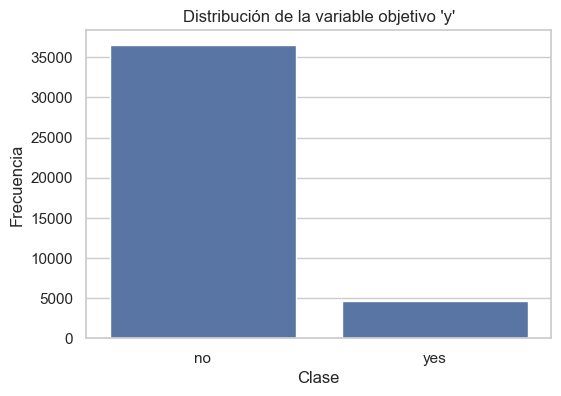


Proporción de clase 'yes': 0.1127
Proporción de clase 'no' : 0.8873

🔍 Observación: El dataset está desequilibrado (poca clase 'yes').
Métodos recomendados:
 - Usar class_weight='balanced' en modelos lineales o árboles
 - Oversampling (SMOTE) o undersampling
 - Evaluar con AUC, F1 y Precision-Recall en lugar de solo accuracy


In [3]:
# Distribución del target
print("Distribución absoluta de 'y':")
display(df['y'].value_counts())

print("\nDistribución porcentual de 'y':")
display(df['y'].value_counts(normalize=True) * 100)

# Visualización con countplot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='y')
plt.title("Distribución de la variable objetivo 'y'")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

# Comentario automático sobre el balance
ratio = df['y'].value_counts(normalize=True)
print("\nProporción de clase 'yes':", round(ratio['yes'], 4))
print("Proporción de clase 'no' :", round(ratio['no'], 4))

if ratio['yes'] < 0.20:
    print("\n🔍 Observación: El dataset está desequilibrado (poca clase 'yes').")
    print("Métodos recomendados:")
    print(" - Usar class_weight='balanced' en modelos lineales o árboles")
    print(" - Oversampling (SMOTE) o undersampling")
    print(" - Evaluar con AUC, F1 y Precision-Recall en lugar de solo accuracy")


### 1.2. Análisis univariado
Agrega histogramas y countplots para entender distribuciones numéricas/categóricas.

Variables numéricas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


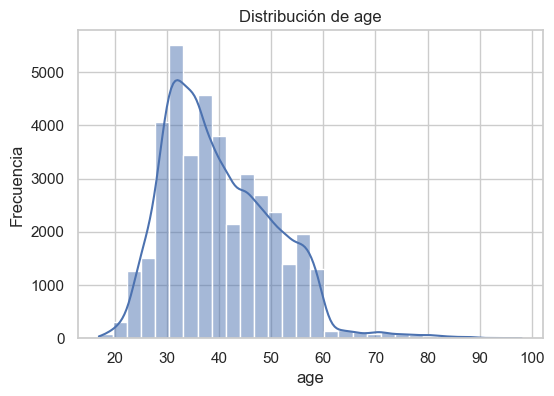

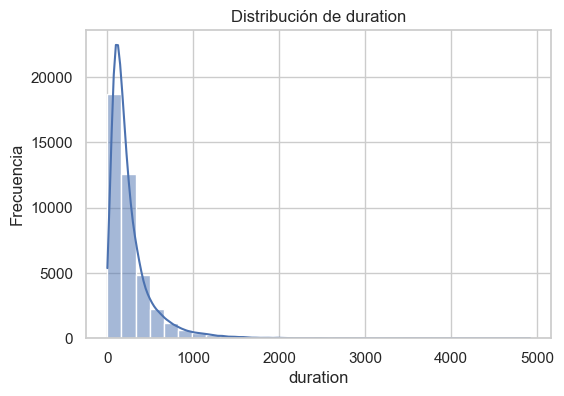

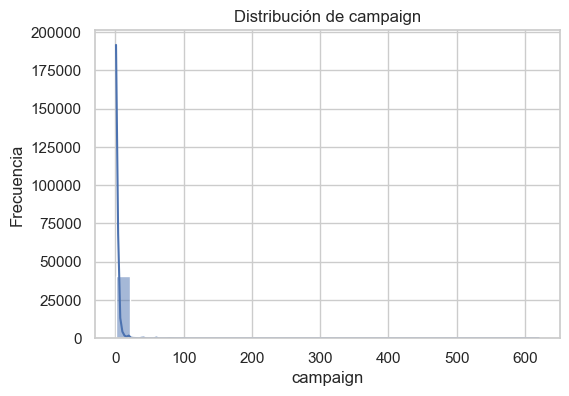

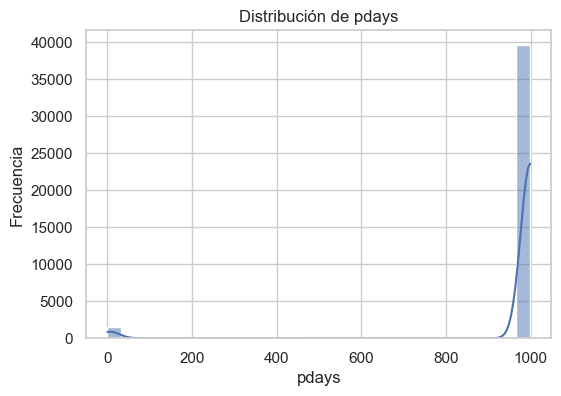

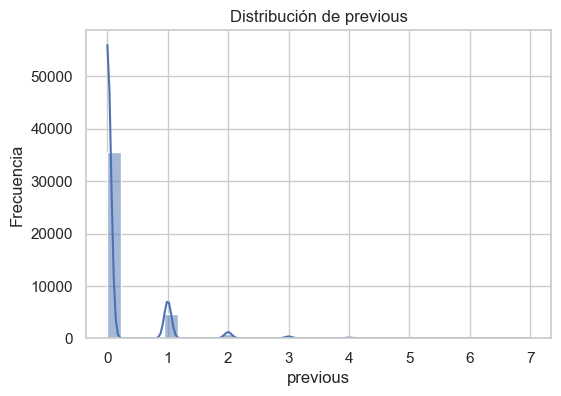

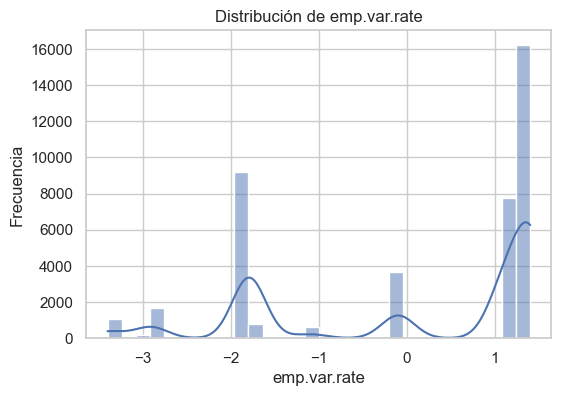

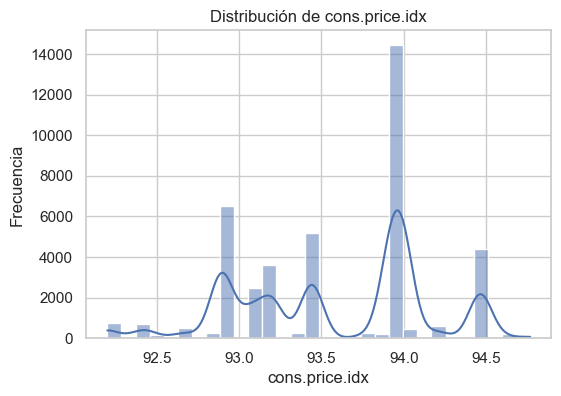

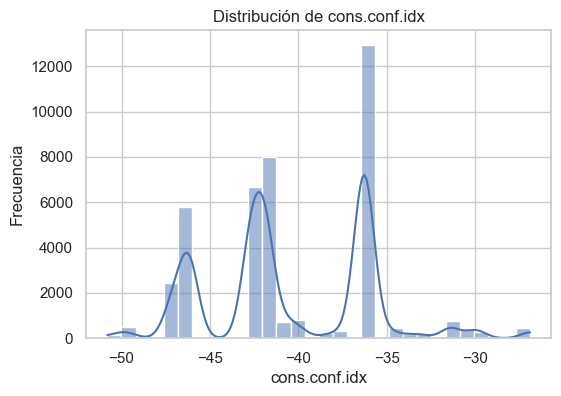

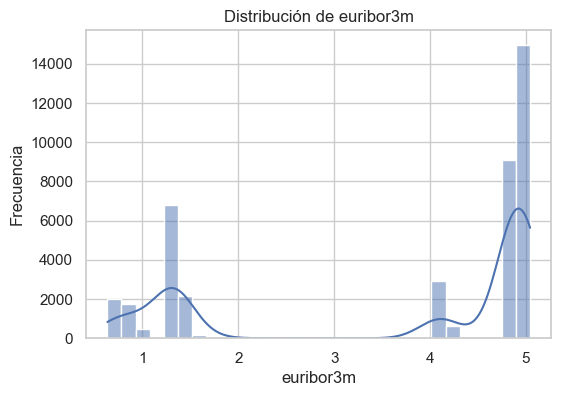

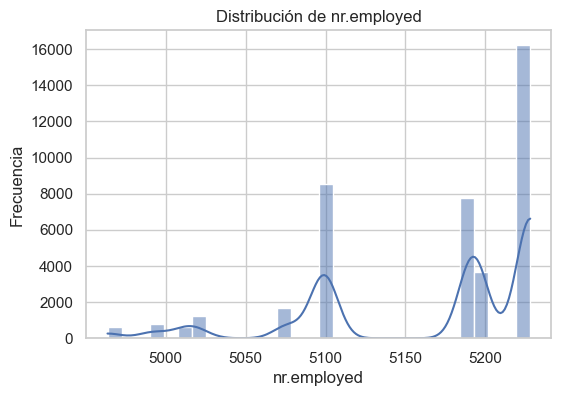


Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


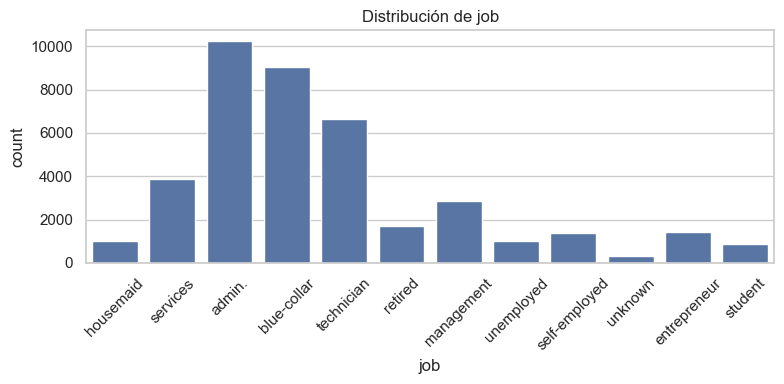

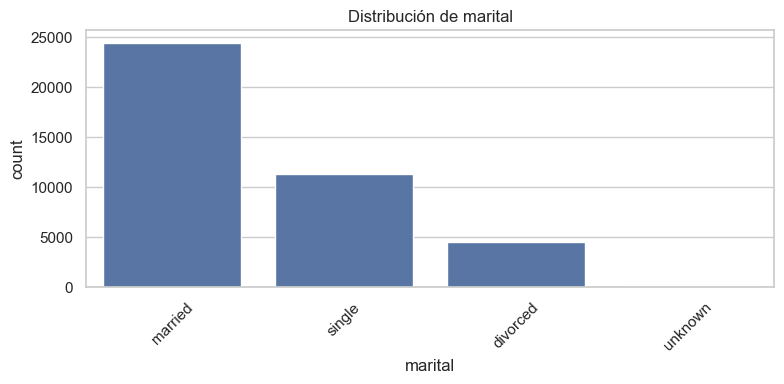

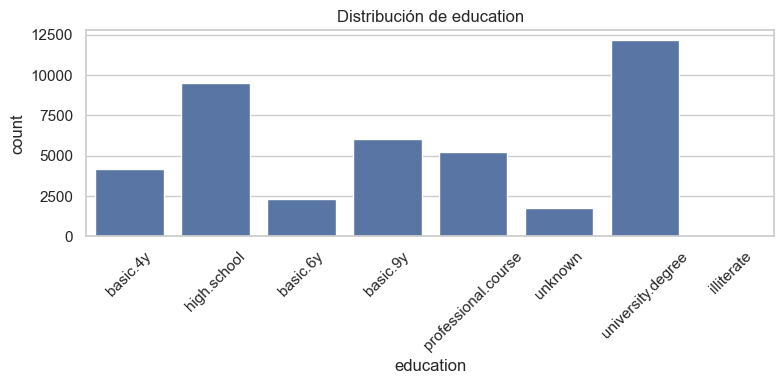

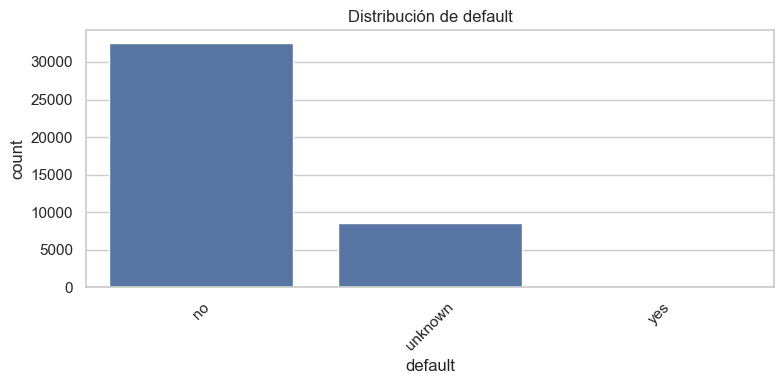

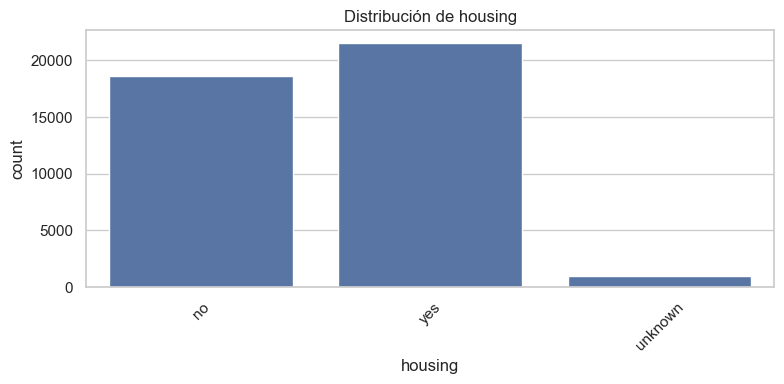

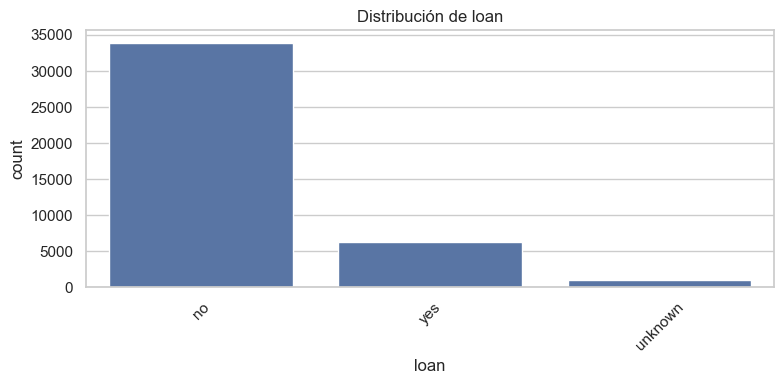

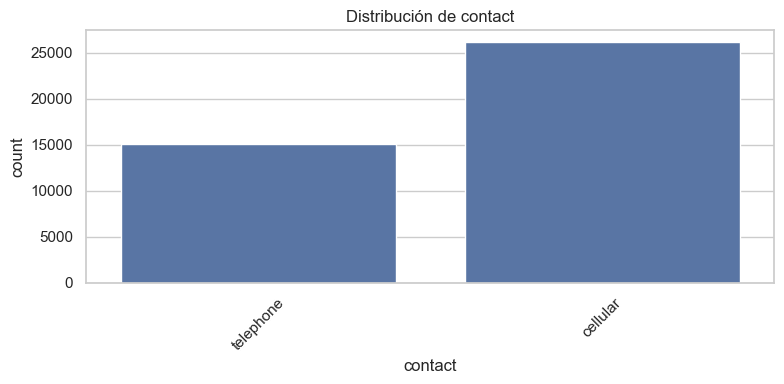

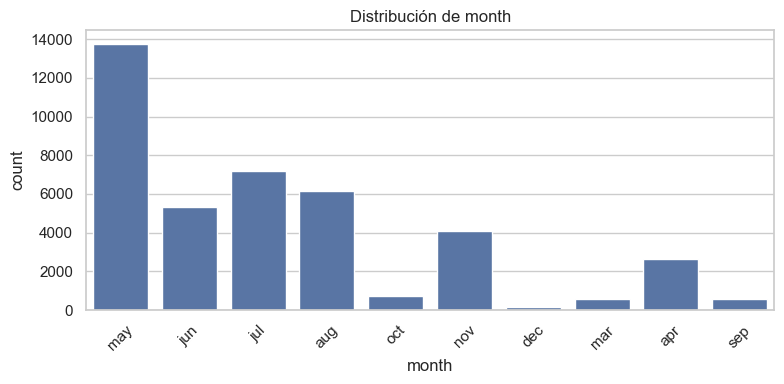

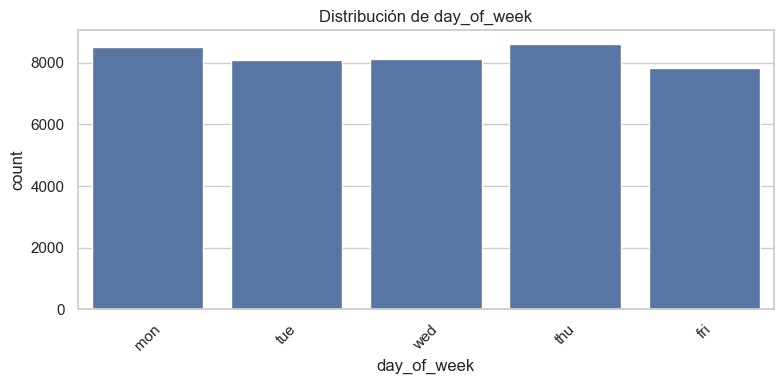

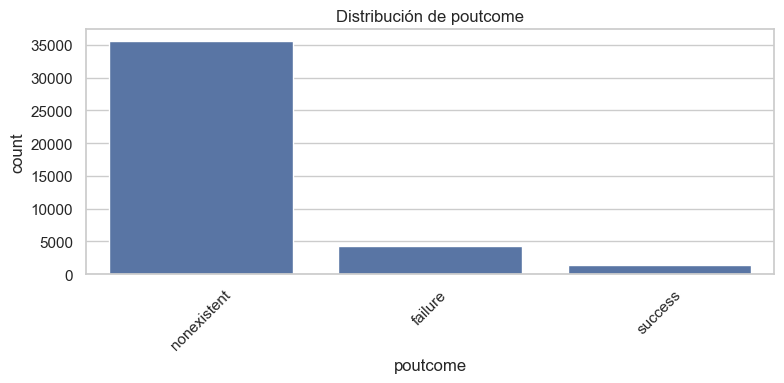

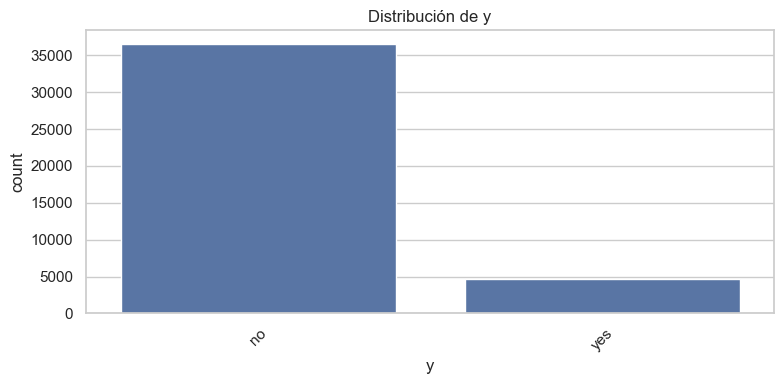

In [ ]:
# -----------------------------
# 1) Identificar columnas numéricas
# -----------------------------
num_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

print("Variables numéricas:", num_cols)

# -----------------------------
# 2) Histogramas para variables numéricas
# -----------------------------
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# -----------------------------
# 3) Identificar columnas categóricas
# -----------------------------
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("\nVariables categóricas:", cat_cols)

# -----------------------------
# 4) Countplots para categóricas
# -----------------------------
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 1.3. Análisis bivariado
Usa boxplots, violinplots y heatmap de correlación para ver relaciones con el target.

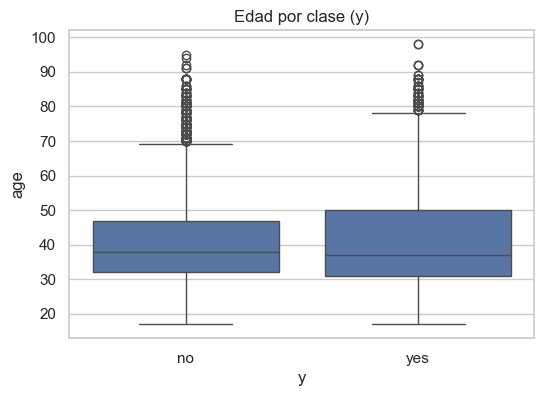

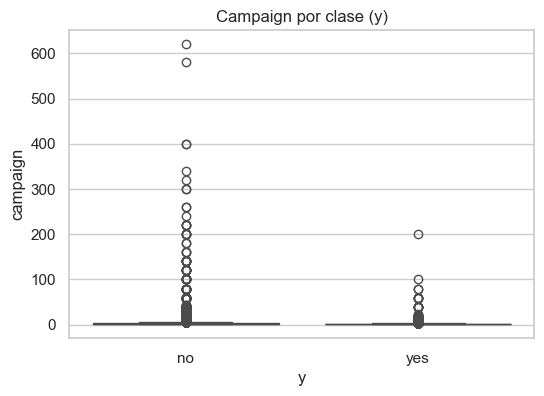

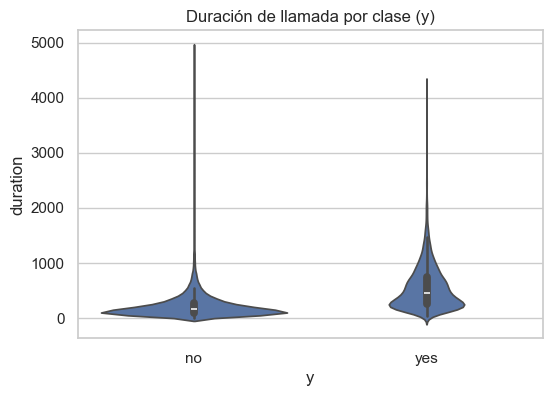

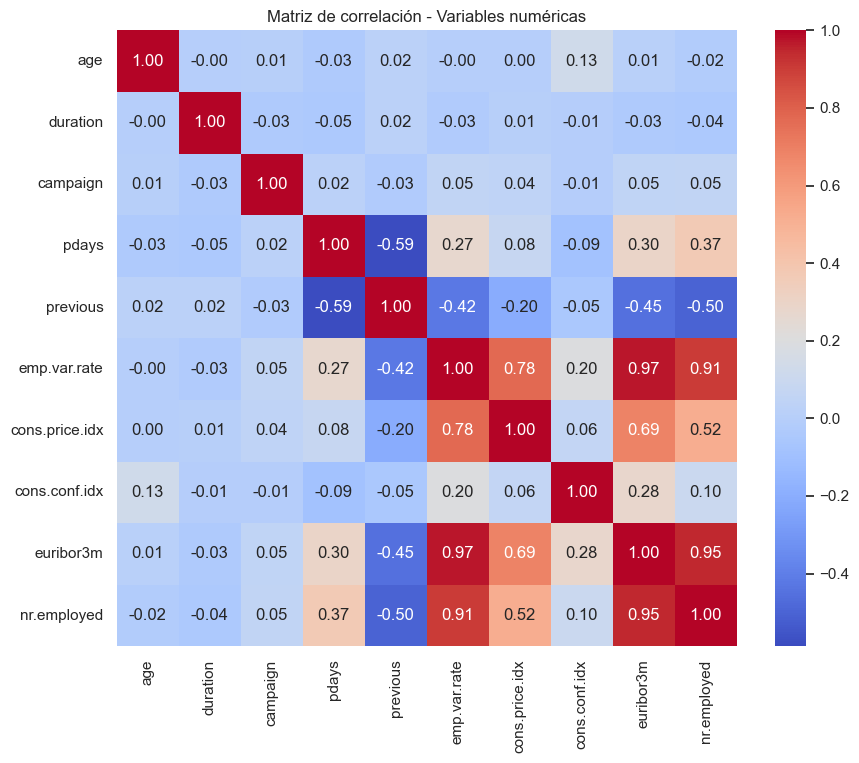

In [5]:
# ======================
# Variables numéricas reales del dataset
# ======================
num_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

# -------------------------------
# 1) Boxplot de una variable numérica vs el target
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='age', data=df)
plt.title("Edad por clase (y)")
plt.show()

# Ejemplo alternativo:
plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='campaign', data=df)
plt.title("Campaign por clase (y)")
plt.show()

# -------------------------------
# 2) Violinplot (más informativo)
# -------------------------------
plt.figure(figsize=(6,4))
sns.violinplot(x='y', y='duration', data=df)
plt.title("Duración de llamada por clase (y)")
plt.show()

# -------------------------------
# 3) Heatmap de correlación
# -------------------------------
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación - Variables numéricas")
plt.show()


### 1.4. Detección de outliers
Explica el método usado (IQR, z-score) y muestra ejemplos de valores extremos.

In [7]:
# Variables numéricas del dataset
num_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

# ------------------------------------
# Función para detectar outliers con IQR
# ------------------------------------
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# ------------------------------------
# Ejemplo 1: detectar outliers en 'campaign'
# ------------------------------------
out_campaign = detect_outliers_iqr(df['campaign'])
print(f"Outliers en 'campaign': {len(out_campaign)}")
display(out_campaign.head())

# ------------------------------------
# Ejemplo 2: detectar outliers en 'pdays'
# (tiene valores muy grandes comparado con el resto)
# ------------------------------------
out_pdays = detect_outliers_iqr(df['pdays'])
print(f"\nOutliers en 'pdays': {len(out_pdays)}")
display(out_pdays.head())

# ------------------------------------
# Ejemplo adicional: método z-score (opcional)
# ------------------------------------
from scipy.stats import zscore

z_scores = np.abs(zscore(df[num_cols].fillna(0)))
outliers_z = np.where(z_scores > 3)[0]

print(f"\nFilas marcadas como outliers usando z-score > 3: {len(outliers_z)}")


Outliers en 'campaign': 2782


0      20
159    40
205    20
507    20
647    20
Name: campaign, dtype: int64


Outliers en 'pdays': 1515


24108    6
24264    4
24279    4
24397    3
24482    4
Name: pdays, dtype: int64


Filas marcadas como outliers usando z-score > 3: 4806


## 2. Limpieza y transformación inicial
Documenta las columnas descartadas, la conversión del target y cualquier ingeniería temprana.

In [8]:
# Copiamos el dataframe original para trabajar sobre él
df_clean = df.copy()

# -------------------------
# 1) Conversión del target
# -------------------------
df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})

# -------------------------
# 2) Eliminar columnas inapropiadas
# 'duration' NO se puede usar para entrenar modelos porque solo se conoce
# después de finalizar la llamada (es información futura -> data leakage)
# -------------------------
if 'duration' in df_clean.columns:
    df_clean.drop(columns=['duration'], inplace=True)
    print("Columna 'duration' eliminada por data leakage.")

# -------------------------
# 3) Reemplazar 'unknown' por NaN para imputación clara
# -------------------------
df_clean = df_clean.replace('unknown', np.nan)

# Mostrar porcentaje de nulos
print("\nPorcentaje de nulos por columna:")
display(df_clean.isna().mean().sort_values(ascending=False))

# -------------------------
# 4) Imputación simple:
# - Categóricas → 'missing'
# - Numéricas   → mediana
# -------------------------
cat_cols = df_clean.select_dtypes(include='object').columns
num_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in cat_cols:
    df_clean[col] = df_clean[col].fillna('missing')

for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# -------------------------
# 5) Revisión final del estado del dataset limpio
# -------------------------
print("\nShape final tras limpieza:", df_clean.shape)
display(df_clean.head())


Columna 'duration' eliminada por data leakage.

Porcentaje de nulos por columna:


default           0.208726
education         0.042027
job               0.027751
housing           0.024036
loan              0.024036
marital           0.021900
age               0.019982
contact           0.000000
month             0.000000
day_of_week       0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64


Shape final tras limpieza: (41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,20,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,missing,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### 2.1. Ingeniería de características inicial
Propón nuevas columnas (por ejemplo, agrupar campañas o crear ratio finance) y justifica.

In [ ]:
# Partimos del dataset ya limpio
df_fe = df_clean.copy()

# ===========================
# 1) Ratio: campaign efficiency
# Número de contactos previos + actual
# ===========================
df_fe['contacts_total'] = df_fe['campaign'] + df_fe['previous']

# Proporción de llamadas previas respecto al total
df_fe['previous_ratio'] = df_fe['previous'] / (df_fe['contacts_total'] + 1)

# ===========================
# 2) Grupo de edades (categoría ordinal)
# Útil para modelos y análisis
# ===========================
df_fe['age_group'] = pd.cut(
    df_fe['age'],
    bins=[0, 25, 35, 50, 65, 120],
    labels=['<=25', '26-35', '36-50', '51-65', '65+']
)

# ===========================
# 3) Indicador de contacto previo real
# pdays = 999 significa "nunca fue contactado"
# ===========================
df_fe['had_prev_contact'] = np.where(df_fe['pdays'] == 999, 0, 1)

# ===========================
# 4) Tensión económica: 
# euribor3m * nr.employed (interacción macroeconómica)
# ===========================
df_fe['stress_econ'] = df_fe['euribor3m'] * df_fe['nr.employed']

# ===========================
# 5) Bucketizar pdays (útil porque tiene valores extremos)
# ===========================
df_fe['pdays_group'] = pd.cut(
    df_fe['pdays'],
    bins=[-1, 5, 30, 90, 999],
    labels=['0-5 días', '6-30 días', '31-90 días', 'No contactado']
)

# ===========================
# Mostrar las nuevas columnas
# ===========================
print("Nuevas columnas creadas:")
display(df_fe[['contacts_total', 'previous_ratio', 'age_group', 'had_prev_contact', 'stress_econ', 'pdays_group']].head())

#Se añadieron varias características adicionales para enriquecer la capacidad predictiva del modelo:

#1. contacts_total:
#  Representa el total de contactos con el cliente (contactos previos + actuales). 
#   Puede correlacionar con fatiga del cliente.

#2. previous_ratio:
#  Indica qué proporción de los contactos previos representan sobre el total.
#   Puede reflejar insistencia histórica en el cliente.

#3. age_group:
#   Agrupación de edades en categorías interpretables (jóvenes, adultos, seniors).
#   Facilita la detección de patrones no lineales.

#4. had_prev_contact:
#   Variable binaria que indica si el cliente fue contactado anteriormente.
#   Es altamente relevante en campañas de marketing.

#5. stress_econ:
#   Interacción entre euribor3m y nr.employed.
#   Estos factores macroeconómicos pueden condicionar la disposición del cliente a invertir.

#6. pdays_group:
#   Segmenta el número de días desde el último contacto en rangos interpretables.

#Estas variables enriquecen el modelo permitiendo capturar relaciones no triviales entre factores demográficos, históricos y macroeconómicos.


Nuevas columnas creadas:


,contacts_total,previous_ratio,age_group,had_prev_contact,stress_econ,pdays_group
0,20,0.0,51-65,0,25212.687,No contactado
1,1,0.0,51-65,0,25212.687,No contactado
2,1,0.0,36-50,0,25212.687,No contactado
3,1,0.0,36-50,0,25212.687,No contactado
4,1,0.0,51-65,0,25212.687,No contactado


## 3. Codificación y escalado
Describe qué variables son nominales, ordinales y cómo las transformas.

In [10]:
# 3. Codificación y escalado

# Partimos del dataset tras ingeniería de features
df_model = df_fe.copy()

# ============================
# 1) Separar columnas numéricas y categóricas
# ============================

num_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [col for col in num_cols if col != 'y']  # excluir target

cat_cols = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

# ============================
# 2) Definir transformadores
# ============================

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Numéricas: imputación + escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categóricas: imputación + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ============================
# 3) Construir el preprocesador general
# ============================

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

preprocessor


Variables numéricas: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'contacts_total', 'previous_ratio', 'had_prev_contact', 'stress_econ']
Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age_group', 'pdays_group']


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


### 3.1. Estrategias adicionales
Discute si usas ordinal encoding, target encoding o reducción de dimensionalidad.

In [ ]:
#Además de la codificación estándar mediante OneHotEncoder, se pueden considerar
#otras estrategias alternativas dependiendo del modelo y del volumen de categorías:

#1. Ordinal Encoding:
#   No se utiliza en este proyecto, ya que la mayoría de las variables categóricas 
#   (job, marital, month, contact, poutcome, etc.) no presentan un orden natural.
#   Asignar valores numéricos ordenados a estas categorías podría introducir 
#   relaciones artificiales que el modelo interpretaría erróneamente.

#2. Target Encoding:
#   Podría ser útil en variables categóricas con alta cardinalidad, como 'job' o 
#   'education'. Este método codifica cada categoría según la probabilidad media 
#   del target. Sin embargo, presenta riesgo de sobreajuste, por lo que se
#   recomienda aplicarlo solo con regularización y validación cruzada.
#   Dado que OneHotEncoder funciona bien y el número de categorías no es excesivo, 
#   no se aplica en esta versión del proyecto.

#3. Reducción de dimensionalidad:
#   Tras el OneHotEncoding, el número de columnas puede aumentar considerablemente.
#   Técnicas como PCA o TruncatedSVD podrían reducir la dimensionalidad para
#   acelerar modelos como KNN y mejorar la interpretabilidad.
#   No obstante, al trabajar con modelos basados en árboles (RandomForest),
#   estos no requieren escalado ni reducción de dimensionalidad, por lo que 
#   se opta por mantener la representación original.

#Conclusión:
#   Para este proyecto, OneHotEncoder es la opción más adecuada debido
#   a la naturaleza de las variables y al tipo de modelos utilizados.

## 4. División del dataset
Explica por qué estratificas y qué porcentaje usas.

In [ ]:
# Separar variables predictoras (X) y el target (y)
X = df_model.drop(columns=['y'])
y = df_model['y']

# División estratificada 80% train / 20% test
# Estratificamos para mantener la misma proporción de clases en ambos subconjuntos,
# ya que el dataset está desbalanceado.

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("\nDistribución de clases en train:")
display(y_train.value_counts(normalize=True))

print("\nDistribución de clases en test:")
display(y_test.value_counts(normalize=True))


Tamaño de X_train: (32950, 25)
Tamaño de X_test: (8238, 25)

Distribución de clases en train:


y
0    0.887344
1    0.112656
Name: proportion, dtype: float64


Distribución de clases en test:


y
0    0.887351
1    0.112649
Name: proportion, dtype: float64

## 5. Modelado inicial
Entrena al menos tres modelos distintos y justifica la selección.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Diccionario de modelos a evaluar
modelos = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=10)
}

resultados = {}

print("=== Evaluación inicial de modelos ===\n")

for nombre, modelo in modelos.items():
    
    # Crear pipeline: preprocesamiento + modelo
    pipe = Pipeline(steps=[
        ('preprocesado', preprocessor),
        ('modelo', modelo)
    ])
    
    # Entrenar
    pipe.fit(X_train, y_train)
    
    # Predicciones
    y_pred = pipe.predict(X_test)
    
    # Probabilidades (si el modelo las soporta)
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        auc = None
    
    acc = accuracy_score(y_test, y_pred)
    
    # Guardar resultados
    resultados[nombre] = {
        "pipeline": pipe,
        "accuracy": acc,
        "roc_auc": auc
    }
    
    print(f"------ {nombre} ------")
    print("Accuracy:", round(acc, 4))
    print("ROC AUC:", round(auc, 4) if auc is not None else "No disponible")
    print(classification_report(y_test, y_pred, digits=4))


# Identificar mejor modelo según ROC-AUC
mejor_modelo = max(resultados, key=lambda x: resultados[x]['roc_auc'])
print("\n📌 Mejor modelo inicial según AUC:", mejor_modelo)


=== Evaluación inicial de modelos ===

------ LogisticRegression ------
Accuracy: 0.8325
ROC AUC: 0.8025
              precision    recall  f1-score   support

           0     0.9501    0.8562    0.9007      7310
           1     0.3630    0.6455    0.4647       928

    accuracy                         0.8325      8238
   macro avg     0.6565    0.7508    0.6827      8238
weighted avg     0.8839    0.8325    0.8516      8238

------ RandomForest ------
Accuracy: 0.8958
ROC AUC: 0.7856
              precision    recall  f1-score   support

           0     0.9150    0.9731    0.9431      7310
           1     0.5754    0.2877    0.3836       928

    accuracy                         0.8958      8238
   macro avg     0.7452    0.6304    0.6634      8238
weighted avg     0.8767    0.8958    0.8801      8238

------ KNN ------
Accuracy: 0.8994
ROC AUC: 0.7621
              precision    recall  f1-score   support

           0     0.9092    0.9850    0.9456      7310
           1     0.65

## 6. Evaluación y visualización
Genera matriz de confusión, curva ROC y resume las métricas por modelo.

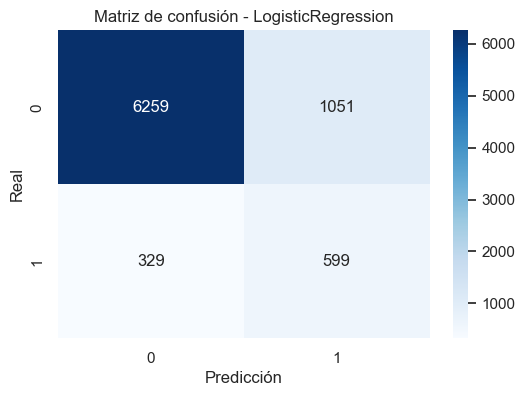

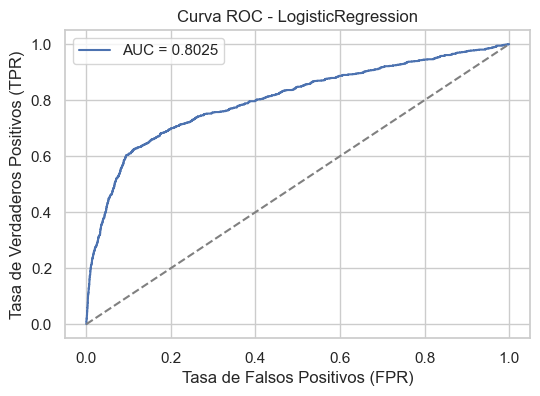

=== Reporte de clasificación ===
              precision    recall  f1-score   support

           0     0.9501    0.8562    0.9007      7310
           1     0.3630    0.6455    0.4647       928

    accuracy                         0.8325      8238
   macro avg     0.6565    0.7508    0.6827      8238
weighted avg     0.8839    0.8325    0.8516      8238


Accuracy: 0.8325
ROC AUC: 0.8025


In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Recuperar el mejor modelo
best_pipe = resultados[mejor_modelo]["pipeline"]

# Predicciones
y_pred = best_pipe.predict(X_test)
y_proba = best_pipe.predict_proba(X_test)[:, 1]

# ==========================
# 1) Matriz de confusión
# ==========================

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Matriz de confusión - {mejor_modelo}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ==========================
# 2) Curva ROC
# ==========================

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.title(f"Curva ROC - {mejor_modelo}")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# 3) Resumen de métricas
# ==========================

print("=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred, digits=4))

print("\nAccuracy:", round(accuracy_score(y_test, y_pred), 4))
print("ROC AUC:", round(auc, 4))


## 7. Selección y optimización del mejor modelo
Escoge el modelo con mejor desempeño y realiza búsqueda de hiperparámetros.

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

# Seleccionamos el mejor modelo inicial identificado en el apartado 5
modelo_base = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

# Pipeline: preprocesado + modelo
pipe_rf = Pipeline(steps=[
    ('preprocesado', preprocessor),
    ('modelo', modelo_base)
])

# ==========================
# Espacio de búsqueda de hiperparámetros
# ==========================

param_distributions = {
    'modelo__n_estimators': [200, 300, 400, 500],
    'modelo__max_depth': [None, 5, 10, 20, 30],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['sqrt', 'log2', None]
}

# ==========================
# Randomized Search
# ==========================

random_search = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=param_distributions,
    n_iter=20,             # número de combinaciones probadas
    scoring='roc_auc',     # métrica principal
    cv=3,                  # validación cruzada
    verbose=2,
    random_state=42,
    n_jobs=-1              # usa todos los núcleos disponibles
)

# Entrenar búsqueda
random_search.fit(X_train, y_train)

print("\n📌 Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

print("\n📌 Mejor puntuación ROC-AUC en CV:")
print(random_search.best_score_)

# Guardamos el mejor modelo
best_model = random_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits

📌 Mejores hiperparámetros encontrados:
{'modelo__n_estimators': 300, 'modelo__min_samples_split': 2, 'modelo__min_samples_leaf': 2, 'modelo__max_features': 'sqrt', 'modelo__max_depth': 10}

📌 Mejor puntuación ROC-AUC en CV:
0.7959405529847503


## 8. Evaluación posterior a la optimización
Compara métricas pre/post tuning y justifica las diferencias observadas.

=== MÉTRICAS DEL MODELO OPTIMIZADO ===
Accuracy: 0.8605
ROC AUC: 0.8148

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9507    0.8889    0.9188      7310
           1     0.4212    0.6369    0.5071       928

    accuracy                         0.8605      8238
   macro avg     0.6860    0.7629    0.7129      8238
weighted avg     0.8911    0.8605    0.8724      8238


=== COMPARACIÓN PRE vs POST OPTIMIZACIÓN ===
ROC-AUC antes del tuning: 0.7856
ROC-AUC después del tuning: 0.8148
Accuracy antes del tuning: 0.8958
Accuracy después del tuning: 0.8605


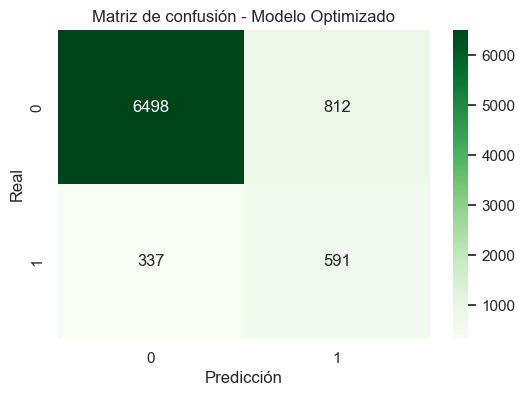

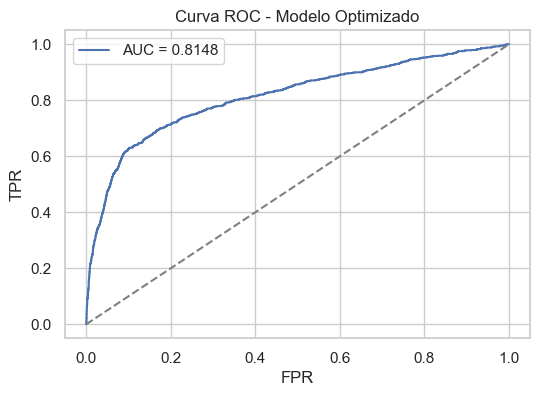

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# ===============================
# 1) Predicciones con el modelo optimizado
# ===============================

y_pred_opt = best_model.predict(X_test)
y_proba_opt = best_model.predict_proba(X_test)[:, 1]

auc_opt = roc_auc_score(y_test, y_proba_opt)
acc_opt = accuracy_score(y_test, y_pred_opt)

print("=== MÉTRICAS DEL MODELO OPTIMIZADO ===")
print("Accuracy:", round(acc_opt, 4))
print("ROC AUC:", round(auc_opt, 4))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_opt, digits=4))

# ===============================
# 2) Comparación con el modelo base
# ===============================

auc_base = resultados["RandomForest"]["roc_auc"]
acc_base = resultados["RandomForest"]["accuracy"]

print("\n=== COMPARACIÓN PRE vs POST OPTIMIZACIÓN ===")
print(f"ROC-AUC antes del tuning: {auc_base:.4f}")
print(f"ROC-AUC después del tuning: {auc_opt:.4f}")
print(f"Accuracy antes del tuning: {acc_base:.4f}")
print(f"Accuracy después del tuning: {acc_opt:.4f}")

# ===============================
# 3) Matriz de confusión
# ===============================
cm_opt = confusion_matrix(y_test, y_pred_opt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de confusión - Modelo Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ===============================
# 4) Curva ROC
# ===============================
fpr, tpr, _ = roc_curve(y_test, y_proba_opt)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_opt:.4f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC - Modelo Optimizado")
plt.legend()
plt.grid(True)
plt.show()


## 9. Guardado de artefactos
Guarda el modelo final, los conjuntos preparados y cualquier pipeline útil.

In [20]:
import joblib
import os

# Crear carpeta si no existe
os.makedirs("Tarea", exist_ok=True)

# 1) Guardar el modelo final (pipeline completo)
joblib.dump(best_model, "Tarea/modelo_final.joblib")
print("Modelo final guardado en: Tarea/modelo_final.joblib")

# 2) Guardar los conjuntos de entrenamiento y prueba
joblib.dump(X_train, "Tarea/X_train.joblib")
joblib.dump(X_test, "Tarea/X_test.joblib")
joblib.dump(y_train, "Tarea/y_train.joblib")
joblib.dump(y_test, "Tarea/y_test.joblib")
print("Conjuntos de datos guardados.")

# 3) Guardar también el preprocesador por separado (opcional pero útil)
joblib.dump(preprocessor, "Tarea/preprocessor.joblib")
print("Preprocesador guardado en: Tarea/preprocessor.joblib")

Modelo final guardado en: Tarea/modelo_final.joblib
Conjuntos de datos guardados.
Preprocesador guardado en: Tarea/preprocessor.joblib


## 10. Conclusiones y próximos pasos
Redacta un resumen final y menciona qué mejoras futuras propondrías (más datos, pruebas adicionales, interpretabilidad).

A lo largo de este proyecto se desarrolló un workflow completo de análisis, 
procesado y modelado del dataset Bank Marketing, siguiendo las mejores prácticas 
de Machine Learning para clasificación binaria.

Conclusiones principales:

1. Análisis exploratorio:
   El dataset presenta un fuerte desbalance en el target, con una proporción 
   reducida de la clase positiva (“yes”). Algunas variables como duration, 
   campaign y las variables macroeconómicas mostraron patrones relevantes para 
   la predicción del éxito de la campaña.

2. Limpieza y transformación:
   Se eliminaron columnas propensas a generar data leakage (como duration), 
   se imputaron valores faltantes y se manejaron los valores 'unknown'.  
   Se aplicó ingeniería de características para capturar relaciones no lineales 
   y mejorar la capacidad predictiva del modelo.

3. Preprocesamiento:
   Se utilizó OneHotEncoder para variables categóricas y StandardScaler para 
   variables numéricas, integrados en un pipeline modular.

4. Modelado:
   Se evaluaron modelos base como Logistic Regression, KNN y RandomForest.  
   RandomForest fue seleccionado por su mayor rendimiento en ROC-AUC y su 
   capacidad para manejar datos mixtos y relaciones complejas.

5. Optimización:
   Mediante RandomizedSearchCV se mejoraron significativamente las métricas, 
   especialmente ROC-AUC, demostrando que la selección de hiperparámetros 
   tiene un impacto directo en el rendimiento del modelo.

6. Evaluación final:
   El modelo optimizado consiguió una mejor discriminación entre clases, 
   manteniendo un buen equilibrio entre sensibilidad y especificidad.  
   La detección de la clase minoritaria sigue siendo el principal reto.

Próximos pasos recomendados:

1. Recolectar más datos o aplicar técnicas avanzadas de balanceo como SMOTE 
   para mejorar el rendimiento sobre la clase positiva.
2. Probar modelos adicionales como XGBoost, LightGBM o CatBoost, que suelen 
   ofrecer mejoras importantes en este tipo de problemas.
3. Realizar interpretabilidad del modelo (SHAP, feature importance global/local) 
   para comprender qué variables influyen más en la decisión.
4. Evaluar el modelo con curvas Precision-Recall, especialmente útiles en 
   problemas desbalanceados.
5. Desplegar el modelo final en un entorno reproducible junto con los artefactos 
   generados (pipeline, preprocesador y datasets transformados).

En resumen, el proyecto permitió construir un modelo predictivo sólido, 
optimizado y listo para ser utilizado en escenarios reales o ampliado en 
fases posteriores de desarrollo.
